# Visualizing PSP Data Using pySPEDAS

#### Documentation
- https://pyspedas.readthedocs.io/en/latest/psp.html
- http://sweap.cfa.harvard.edu/sweap_data_user_guide.pdf

19-Dec-22 14:36:21: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/psp/sweap/spc/l3/l3i/2021/
19-Dec-22 14:36:21: File is current: psp_data/sweap/spc/l3/l3i/2021/psp_swp_spc_l3i_20210424_v02.cdf


79 days
Using LEVEL=L3


19-Dec-22 14:36:21: File is current: psp_data/sweap/spc/l3/l3i/2021/psp_swp_spc_l3i_20210425_v02.cdf
19-Dec-22 14:36:21: File is current: psp_data/sweap/spc/l3/l3i/2021/psp_swp_spc_l3i_20210426_v02.cdf
19-Dec-22 14:36:21: File is current: psp_data/sweap/spc/l3/l3i/2021/psp_swp_spc_l3i_20210427_v02.cdf
19-Dec-22 14:36:22: File is current: psp_data/sweap/spc/l3/l3i/2021/psp_swp_spc_l3i_20210428_v02.cdf
19-Dec-22 14:36:22: File is current: psp_data/sweap/spc/l3/l3i/2021/psp_swp_spc_l3i_20210429_v02.cdf
19-Dec-22 14:36:22: File is current: psp_data/sweap/spc/l3/l3i/2021/psp_swp_spc_l3i_20210430_v02.cdf
19-Dec-22 14:36:22: File is current: psp_data/sweap/spc/l3/l3i/2021/psp_swp_spc_l3i_20210501_v02.cdf
19-Dec-22 14:36:22: File is current: psp_data/sweap/spc/l3/l3i/2021/psp_swp_spc_l3i_20210502_v02.cdf
19-Dec-22 14:36:22: File is current: psp_data/sweap/spc/l3/l3i/2021/psp_swp_spc_l3i_20210503_v02.cdf


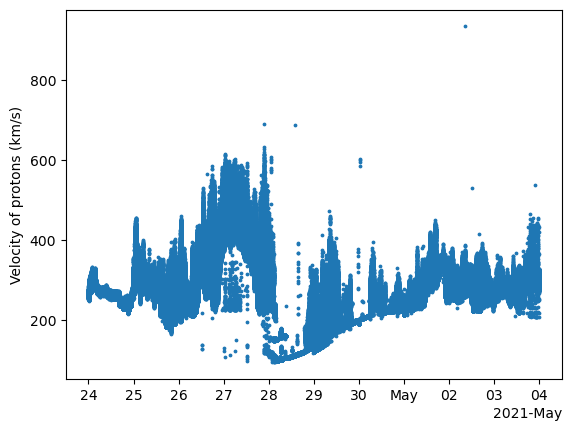

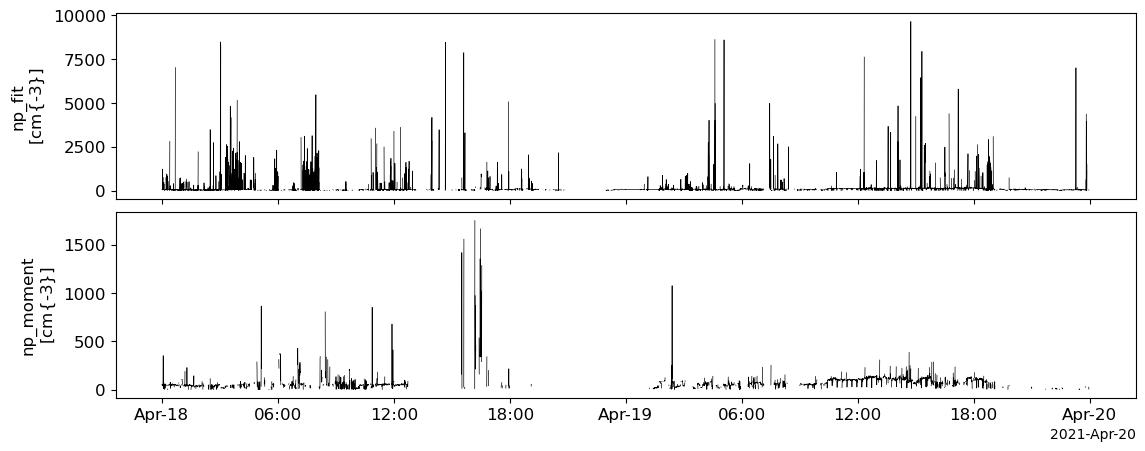

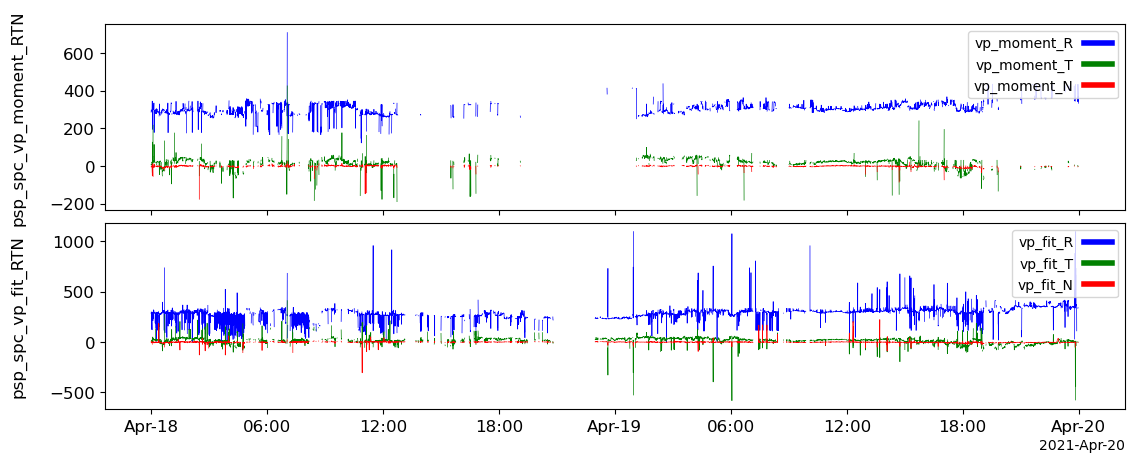

In [58]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import math
import pyspedas
from pytplot import tplot

# datetime testing
from datetime import datetime
start = datetime(2022, 10, 1)
today = datetime.now()
print(f"{(today - start).days} days")

spc_vars = pyspedas.psp.spc(trange=['2021-04-24', '2021-05-04'], datatype='l3i', level='l3', get_support_data=True, notplot=True, no_update=False)
t = spc_vars['psp_spc_vp_moment_RTN']['x']
v = spc_vars['psp_spc_vp_moment_RTN']['y']
vdata = pd.DataFrame(v)
velocities = []
for row in v:
    total = 0
    for dir in row:
        if np.isnan(dir):
            continue
        total += dir**2
    total = math.sqrt(total)
    if total==0:
        total = row[0]
    velocities.append(total)
velocityplot = plt.scatter(t, np.array(velocities), s=3)
plt.ylabel("Velocity of protons (km/s)")
tplot(['psp_spc_np_fit', 'psp_spc_np_moment'])
tplot(['psp_spc_vp_moment_RTN', 'psp_spc_vp_fit_RTN'])